<a href="https://colab.research.google.com/github/annalutepedino/EnergyData/blob/main/MVP_1_Anna_Tepedinov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de dados e Boas Práticas**

Anna Luiza Tepedino

*Maio/2023*


# **1 - Descrição do problema**

A importância do setor energético para o desenvolvimento social e econômico é reconhecida no mercado internacional. Há uma estreita relação entre a quantidade e a qualidade de energia disponível e o avanço da
economia. Neste contexto, é importante analisar o comportamento da produção e do consumo de energia ao longo do tempo, para identificar quais as futuras necessidades da população de cada região do planeta.

O Dataset disponibilizado pela BP energy visa apresentar esse comportamento do mercado de energia ao redor no mundo. Para mais informações acessar: https://www.bp.com/en/global/corporate/news-and-insights/press-releases/statistical-review-of-world-energy-to-pass-to-new-home-at-the-energy-institute.html


Neste trabalho iremos analisar o Dataset com o objetivo de discutir o comportamento do mercado de energia nos últimos anos.


> **Identificação atributos:**
1. **pais** - País
2. **ano** - Ano de coleta do dado
3. **regiao** - Região geográfica
4. **co2_comb** - Emissões de CO2 da combustão de combustível (MtCO2) 
5. **co2_fator** - Fator médio de emissão de CO2 (tCO2/toe)
6. **co2_intensidade** - Intensidade de CO2 em paridades de poder de compra constantes (kCO2/15p)
7. **energia_total** - Produção total de energia (Mtoe)
8. **consumo_total** - Consumo total de energia (Mtoe)
9. **%renov_producao** - Participação de renováveis na produção de eletricidade (%)
10. **%elet_consumototal** - Participação da eletricidade no consumo final total de energia (%)
11. **derivados_consumo** - Consumo interno de derivados de petróleo (Mt)
12. **derivados_producao** - Produção de derivados de petróleo refinado (Mt)
13. **gn_producao** - Produção de gás natural (bcm)
14. **gn_consumo** - Consumo doméstico de gás natural (bcm)
15. **pib_intensidade** - Intensidade energética do PIB em paridades de poder de compra constantes (koe/$15p)
16. **elet_producao** - Produção de eletricidade (TWh)
17. **elet_consumodomestico** - Consumo doméstico de eletricidade (TWh)
18. **carvao_consumo** - Consumo doméstico de carvão e linhito (Mt)
19. **eolica_solar** - Participação da energia eólica e solar na produção de eletricidade (%)
20. **petroleto_producao** - Produção de petróleo bruto (Mt)
21. **carvao_producao** - Produção de carvão e lignite (Mt)



> **Unidades de Medida:**
- **Mtoe** million tons of oil equivalent (103 toe)
- **toe** tons of oil equivalent
- **koe** kilo of oil equivalent (10-3 toe)
- **Mt** million tons
- **bcm** billion cubic meters (109 cubic meters)
- **TWh**terawatt hour
- **tCO2**tons of carbon dioxide
- **kCO2**kilogramme of carbon dioxide (10-3 tCO2)










In [1]:
# Importacao de Pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

import missingno as ms 
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


import missingno as ms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# **2 - Importação da Base de Dados**

In [3]:
# Apresentacao da URL para importar o Dataset

urldados = "https://raw.githubusercontent.com/annalutepedino/EnergyData/main/Energy%20data%201990%20-%202020.csv"

# Nomeando o cabeçalho das colunas
colunas = ['pais','ano','regiao','co2_comb','co2_fator','co2_intensidade','energia_total','consumo_total','%renov_producao','%elet_consumototal','derivados_consumo','derivados_producao','gn_producao','gn_consumo','pib_intensidade','elet_producao','elet_consumodomestico','carvao_consumo','eolica_solar','petroleto_producao','carvao_producao']

#Leitura do arquivo depositado na url para carregar como dataframe
EnergyData = pd.read_csv(urldados, names=colunas, skiprows=1, delimiter=',')

EnergyData.head()


,pais,ano,regiao,co2_comb,co2_fator,co2_intensidade,energia_total,consumo_total,%renov_producao,%elet_consumototal,...,derivados_producao,gn_producao,gn_consumo,pib_intensidade,elet_producao,elet_consumodomestico,carvao_consumo,eolica_solar,petroleto_producao,carvao_producao
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0


# **3 - Análise e Exploração de Dados**

Nesta primeira etapa da análise vamos verificar as informações gerais da Base de Dados, para entender os tipos de dados que vamos analisar.

In [4]:
# Verificação dos tipos dos atributos do banco importado 
#Essa etapa é importante para identificação de valores Missings e do tipo de variáveis que compões a Base de Dados.

EnergyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pais                   1364 non-null   object 
 1   ano                    1364 non-null   int64  
 2   regiao                 1364 non-null   object 
 3   co2_comb               1364 non-null   float64
 4   co2_fator              1364 non-null   float64
 5   co2_intensidade        1364 non-null   float64
 6   energia_total          1364 non-null   float64
 7   consumo_total          1364 non-null   float64
 8   %renov_producao        1364 non-null   float64
 9   %elet_consumototal     1364 non-null   float64
 10  derivados_consumo      1364 non-null   float64
 11  derivados_producao     1364 non-null   float64
 12  gn_producao            1364 non-null   object 
 13  gn_consumo             1364 non-null   float64
 14  pib_intensidade        1364 non-null   float64
 15  elet

In [5]:
#Confirmação das dimensões da Base de Dados
print(EnergyData.shape)

(1364, 21)


Anteriormente já visualizamos o início da Base de Dados com a função "head". Agora, vamos  verificar as últimas linhas do arquivo.

In [6]:
#Leitura das últimas linhas da Base de Dados

EnergyData.tail()


,pais,ano,regiao,co2_comb,co2_fator,co2_intensidade,energia_total,consumo_total,%renov_producao,%elet_consumototal,...,derivados_producao,gn_producao,gn_consumo,pib_intensidade,elet_producao,elet_consumodomestico,carvao_consumo,eolica_solar,petroleto_producao,carvao_producao
1359,Venezuela,2016,South/Latin America,130.244135,2.214743,0.304632,169.124743,58.807791,58.377863,19.308332,...,42.060000,24.47599903,22.692979,0.137547,107.981000,73.420000,0.202,0.07223493,131.988000,0.9
1360,Venezuela,2017,South/Latin America,124.106123,2.222989,0.344218,148.976952,55.828488,58.379586,19.658549,...,36.647685,24.00755269,22.803576,0.154845,103.777449,70.153699,0.112222,0.075160838,113.220110,0.5
1361,Venezuela,2018,South/Latin America,113.249553,2.701646,0.390782,115.312748,41.918720,58.380532,20.319222,...,31.411686,23.70998143,23.828481,0.144646,99.738223,66.530345,0.044889,0.077432701,84.860873,0.2
1362,Venezuela,2019,South/Latin America,101.200206,2.793624,0.537237,81.895069,36.225425,58.377040,21.292363,...,29.023761,19.59998465,21.197943,0.192308,96.463748,64.427278,0.029469014,0.073940761,56.900109,0.29820421
1363,Venezuela,2020,South/Latin America,85.048356,2.916478,0.601990,51.397630,29.161319,60.944184,23.787544,...,25.405931,14.62158855,17.813666,0.206410,92.816467,61.944911,0.019346004,0.07684631,32.229088,0.195766979


In [7]:
# Análise Estatística - resumo de variáveis estatísticas da Base de Dados (média, desvio padrão, mínimo, máximo e os quartis)

EnergyData.describe()

,ano,co2_comb,co2_fator,co2_intensidade,energia_total,consumo_total,%renov_producao,%elet_consumototal,derivados_consumo,derivados_producao,gn_consumo,pib_intensidade,elet_producao,elet_consumodomestico,petroleto_producao
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2005.000000,550.375178,2.238542,0.339275,229.826912,225.967632,24.076995,17.622567,68.848847,76.888589,59.809200,0.148322,388.581268,334.988933,74.128901
std,8.947552,1213.057599,0.560594,0.246502,400.993541,445.242818,25.490850,7.296381,128.339745,134.644907,117.396106,0.090503,834.834194,732.822644,119.664826
min,1990.000000,7.597759,0.412331,0.063650,2.939712,2.622633,0.000000,0.937144,1.949000,0.013357,0.000000,0.051662,10.780000,7.871000,0.000000
25%,1997.000000,99.947198,2.021666,0.194481,34.720989,46.632538,6.097708,13.259106,12.809000,15.883000,10.650942,0.094997,70.020000,55.962250,1.599250
50%,2005.000000,221.036281,2.339406,0.255510,102.602180,93.825969,14.871924,16.869971,27.752179,37.011757,28.045997,0.121372,146.845534,123.632788,25.896500
75%,2013.000000,423.833152,2.521811,0.421460,217.237230,195.807818,33.281413,21.392581,77.500856,85.048250,53.495693,0.176885,308.447191,287.612059,106.382250
max,2020.000000,9716.772478,3.516984,1.820894,2749.046580,3381.399262,99.817877,50.011500,888.491000,908.397596,882.637083,0.775061,7797.561415,6752.147800,748.192443


# Criacão de Funções 

Após o estudo das informações presentes na Base de Dados, foi possível identificar a necessidade de criação de mais uma coluna para auxiliar no tratamento de dados

In [8]:
# Criando a variável Século para auxiliar na análise temporal dos dados
def calculo_seculo(ano):
  if ano <=2000:
    return "Século 20"
  else:
    return  "Século 21"

In [9]:
# Criando a variável Século para identificação temporal na Base de Dados e analisando as 10 primeiras linhas
EnergyData["seculo"] = EnergyData["ano"].apply(calculo_seculo)   

EnergyData.head(10)

,pais,ano,regiao,co2_comb,co2_fator,co2_intensidade,energia_total,consumo_total,%renov_producao,%elet_consumototal,...,gn_producao,gn_consumo,pib_intensidade,elet_producao,elet_consumodomestico,carvao_consumo,eolica_solar,petroleto_producao,carvao_producao,seculo
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0,Século 20
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0,Século 20
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0,Século 20
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0,Século 20
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0,Século 20
5,Algeria,1995,Arab States,56.828812,2.343684,0.242386,106.721670,24.247643,0.921505,9.543158,...,54.85105523,16.786992,0.103421,20.944,16.102,0.901,0,56.753,0,Século 20
6,Algeria,1996,Arab States,56.165721,2.392260,0.230123,112.659298,23.478104,0.616241,10.084258,...,58.18703399,16.721017,0.096195,21.907,16.697,0.659,0,59.684,0,Século 20
7,Algeria,1997,Arab States,58.074674,2.413863,0.235355,121.641990,24.058809,0.327011,10.226817,...,67.07607734,17.835995,0.097502,22.935,17.123,0.541,0,60.900,0,Século 20
8,Algeria,1998,Arab States,59.494429,2.389441,0.229409,127.093517,24.898894,0.851148,10.561598,...,71.71104545,18.350023,0.096010,25.260,18.674,0.837,0,62.228,0,Século 20
9,Algeria,1999,Arab States,63.247065,2.379565,0.236317,136.982553,26.579256,0.758170,10.379344,...,80.54808681,19.539015,0.099311,26.775,19.991,0.849,0,64.412,0,Século 20


In [22]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Análise e tratamento do dataframe

Conforme descrito no início desta análise, o objetivo do trabalho é analisar o comportamento da produção e do consumo de energia ao longo do tempo. Sendo assim, neste momento os atributos relacionados a gases poluentes não serão necessários para o estudo. Iremos focar apenas em variáveis relacionadas ao mercado de energia (Produção e Consumo). 

A próxima etapa do tratamento será resumir as informações do Dataset e trabalhar apenas com atributos que irão gerar valor ao estudo em questão.


In [10]:
# Criando uma versão resumida da Base de dados para verficar a apresentação dos principais dados 

Energy = EnergyData[['pais','ano','seculo','regiao','energia_total','consumo_total','%renov_producao','%elet_consumototal','derivados_consumo','derivados_producao','gn_producao','gn_consumo','elet_producao','elet_consumodomestico','carvao_consumo','carvao_producao','eolica_solar','petroleto_producao','pib_intensidade']]
Energy


,pais,ano,seculo,regiao,energia_total,consumo_total,%renov_producao,%elet_consumototal,derivados_consumo,derivados_producao,gn_producao,gn_consumo,elet_producao,elet_consumodomestico,carvao_consumo,carvao_producao,eolica_solar,petroleto_producao,pib_intensidade
0,Algeria,1990,Século 20,Arab States,100.112749,22.188078,0.782972,8.376592,8.080000,25.395000,45.68403547,14.301991,17.242000,13.693000,0.94,0,0,57.850000,0.095856
1,Algeria,1991,Século 20,Arab States,102.586171,23.469959,1.580793,7.994748,8.450000,25.435000,49.53198889,15.312995,18.535000,14.058000,1.171,0,0,57.076000,0.102625
2,Algeria,1992,Século 20,Arab States,104.205908,24.024343,1.022926,8.490068,8.349000,25.459000,51.67001137,15.727010,19.454000,15.130000,1.056,0,0,56.904000,0.103192
3,Algeria,1993,Século 20,Arab States,104.928745,24.110238,1.709195,8.291029,8.390000,25.463000,52.38599054,16.596984,20.653000,15.144000,1.015,0,0,56.995000,0.105782
4,Algeria,1994,Século 20,Arab States,100.612596,23.239627,0.783869,9.170605,7.562000,23.971000,48.20601995,16.117004,21.177000,15.545000,0.943,0,0,56.312000,0.102888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Venezuela,2016,Século 21,South/Latin America,169.124743,58.807791,58.377863,19.308332,27.675000,42.060000,24.47599903,22.692979,107.981000,73.420000,0.202,0.9,0.07223493,131.988000,0.137547
1360,Venezuela,2017,Século 21,South/Latin America,148.976952,55.828488,58.379586,19.658549,25.275156,36.647685,24.00755269,22.803576,103.777449,70.153699,0.112222,0.5,0.075160838,113.220110,0.154845
1361,Venezuela,2018,Século 21,South/Latin America,115.312748,41.918720,58.380532,20.319222,22.891802,31.411686,23.70998143,23.828481,99.738223,66.530345,0.044889,0.2,0.077432701,84.860873,0.144646
1362,Venezuela,2019,Século 21,South/Latin America,81.895069,36.225425,58.377040,21.292363,20.825058,29.023761,19.59998465,21.197943,96.463748,64.427278,0.029469014,0.29820421,0.073940761,56.900109,0.192308


Agora vamos verificar o resumo estatístico da Base de Dados resumida que será usada no estudo. 

In [11]:
# Análise Estatística do Dataset resumido

Energy.describe()

,ano,energia_total,consumo_total,%renov_producao,%elet_consumototal,derivados_consumo,derivados_producao,gn_consumo,elet_producao,elet_consumodomestico,petroleto_producao,pib_intensidade
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2005.000000,229.826912,225.967632,24.076995,17.622567,68.848847,76.888589,59.809200,388.581268,334.988933,74.128901,0.148322
std,8.947552,400.993541,445.242818,25.490850,7.296381,128.339745,134.644907,117.396106,834.834194,732.822644,119.664826,0.090503
min,1990.000000,2.939712,2.622633,0.000000,0.937144,1.949000,0.013357,0.000000,10.780000,7.871000,0.000000,0.051662
25%,1997.000000,34.720989,46.632538,6.097708,13.259106,12.809000,15.883000,10.650942,70.020000,55.962250,1.599250,0.094997
50%,2005.000000,102.602180,93.825969,14.871924,16.869971,27.752179,37.011757,28.045997,146.845534,123.632788,25.896500,0.121372
75%,2013.000000,217.237230,195.807818,33.281413,21.392581,77.500856,85.048250,53.495693,308.447191,287.612059,106.382250,0.176885
max,2020.000000,2749.046580,3381.399262,99.817877,50.011500,888.491000,908.397596,882.637083,7797.561415,6752.147800,748.192443,0.775061


Também é importante identificar a existência de Outliers para as principais variáveis que vamos analisar.

In [12]:
#Identificando o valor do desvio padrão multiplicado por 3 e o formatando para 2 casas decimais
índice_outliers1 = round(Energy['pib_intensidade'].std() * 3, 2)
print(índice_outliers1)

índice_outliers2 = round(Energy['energia_total'].std() * 3, 2)
print(índice_outliers2)

índice_outliers2 = round(Energy['consumo_total'].std() * 3, 2)
print(índice_outliers2)

0.27
1202.98
1335.73


Para auxiliar na análise vamos construir alguns gráficos, como Histogramas, Gráfico de Densidade e Box-Plot que nos permitão conhecer a distribuição das variáveis de Consumo e Produção. 

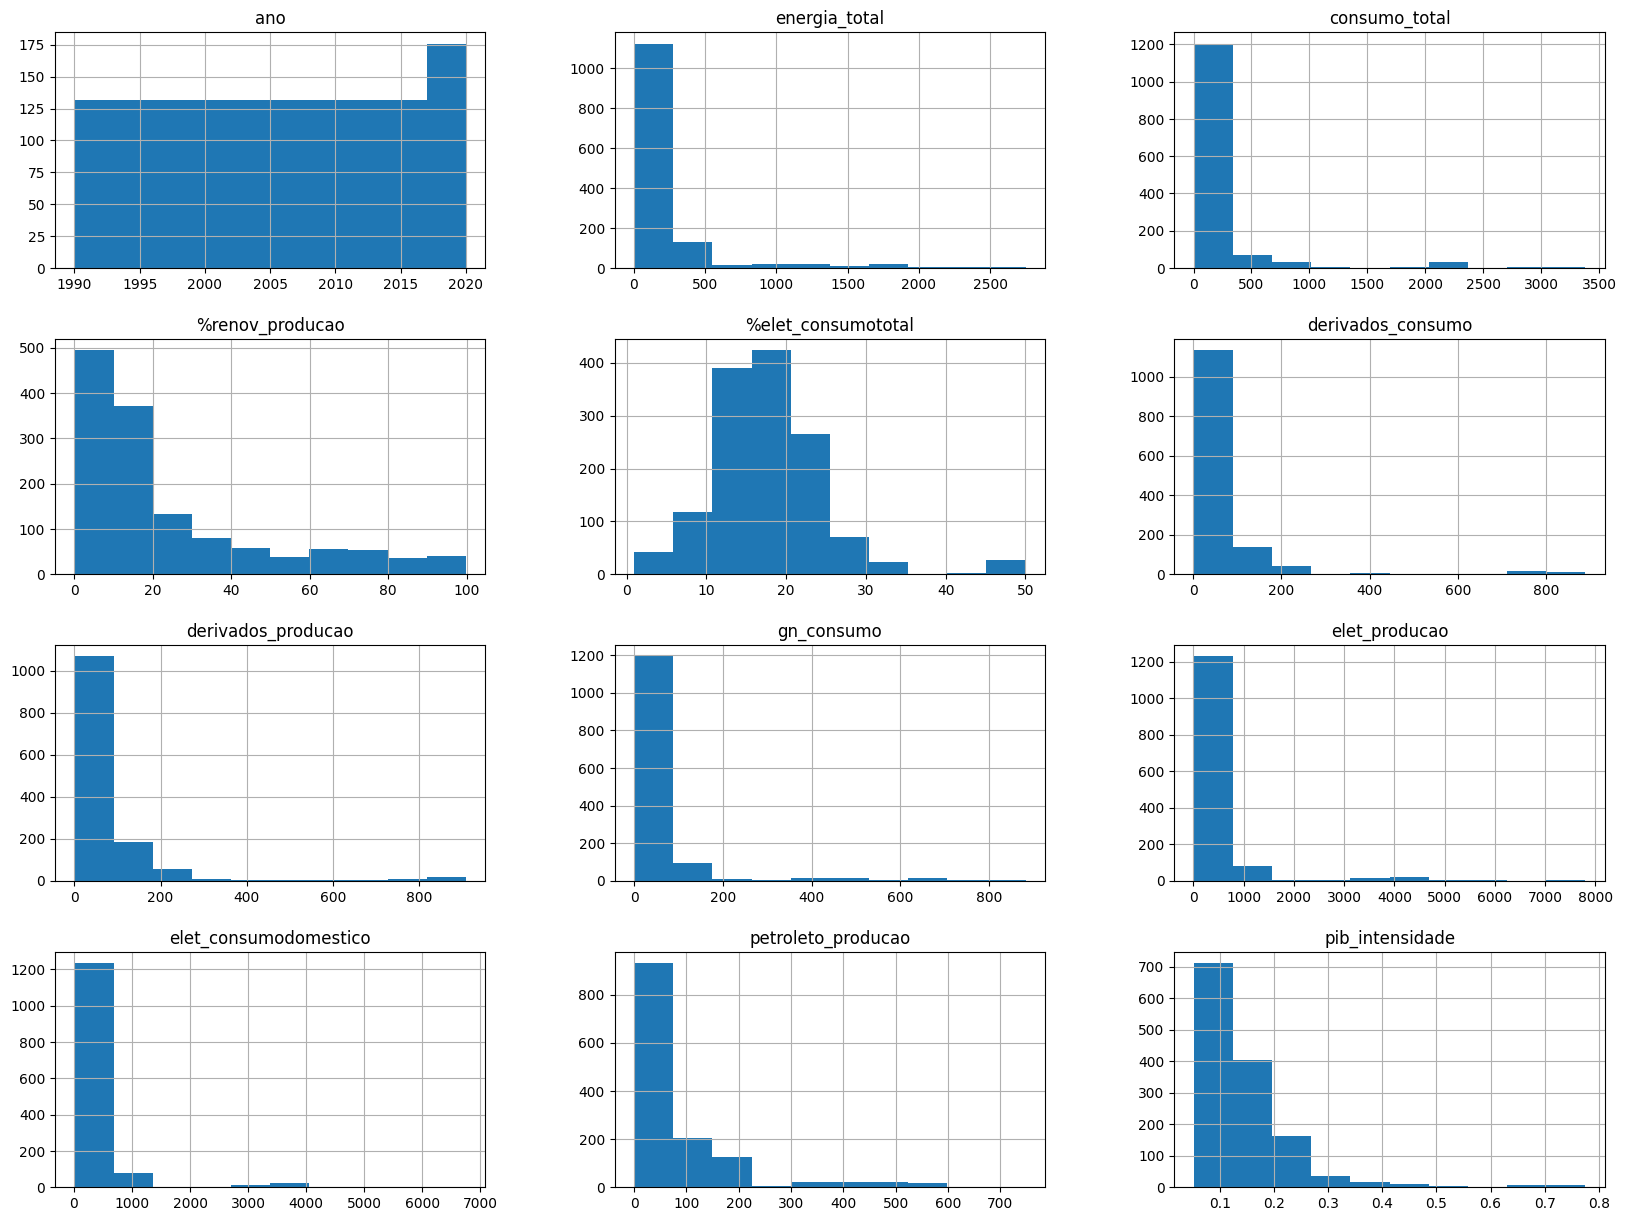

In [13]:
# Gráfico de Histograma dos dados 

Energy.hist(layout = (4,3),figsize = (20,15))
plt.show()

Através da análise do histograma podemos perceber a distribuição das variáveis. O resultado nos mostra que a Participação da eletricidade no consumo final total de energia (%elet_consumototal) é a variável que apresenta uma distribuição mais aproximada da normal.

Essa conclusão é algo esperado para esse tipo de Dataset, pois os dados expostos aqui são variáveis histórias de produção e consumo de energia em diferentes países, então é esperado que os números sejam apresentados na ordem de grandeza acordo com a característica de cada país e em ranges diferentes (de acordo com a unidade de medida).
Quando analisamos a porcentagem os valores das unidades de medida são padronizados, possibilitando uma melhor percepção da curva normal.

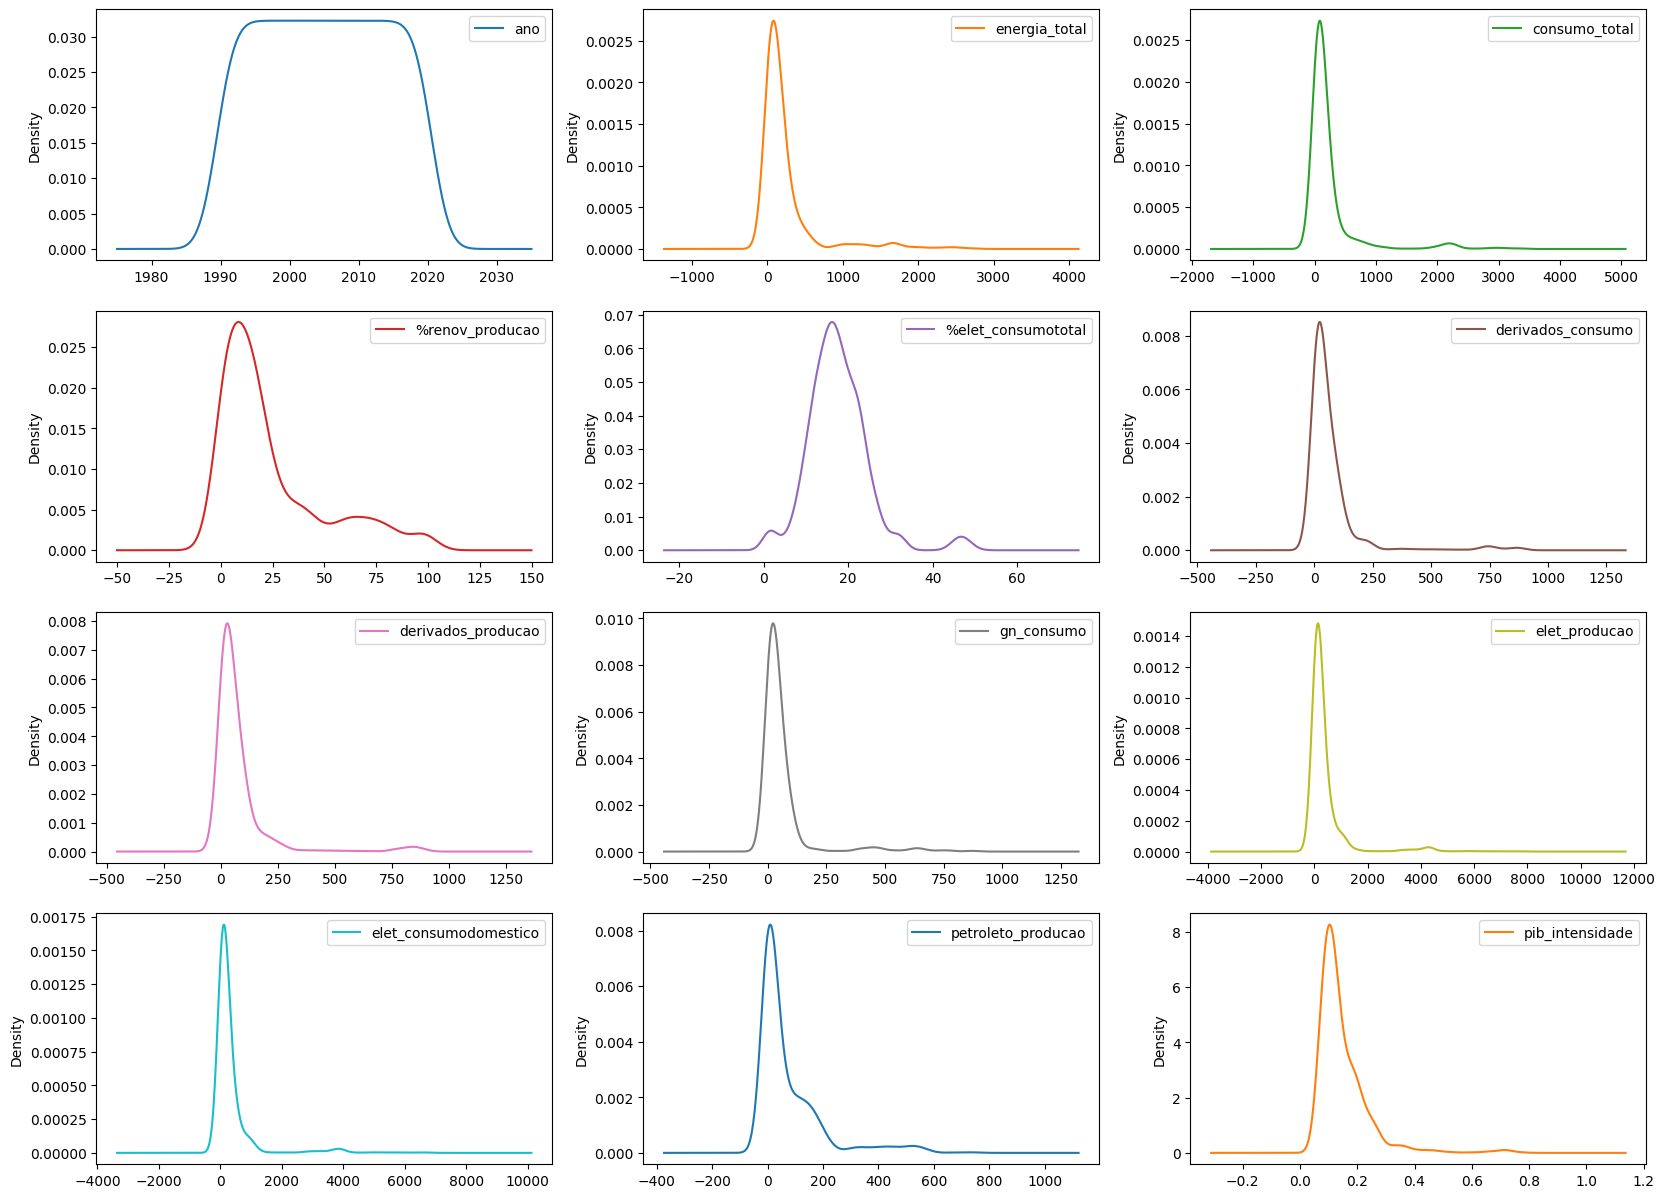

In [14]:
# Density Plot
Energy.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (20,15))
plt.show()

A análise do Gráfico de Densidade nos permite entender a probabilidade dos valores de cada variável para as faixas encontradas. 
É possível perceber que a variável que possui a curva de Densidade mais larga é justamente o Ano, pois os dados do Dataset foram coletados ao longo do tempo, na mesma quantidade para cada país. Portanto, é esperado que essa curva não tenha nenhum pico de probabilidade como nas demais variáveis.

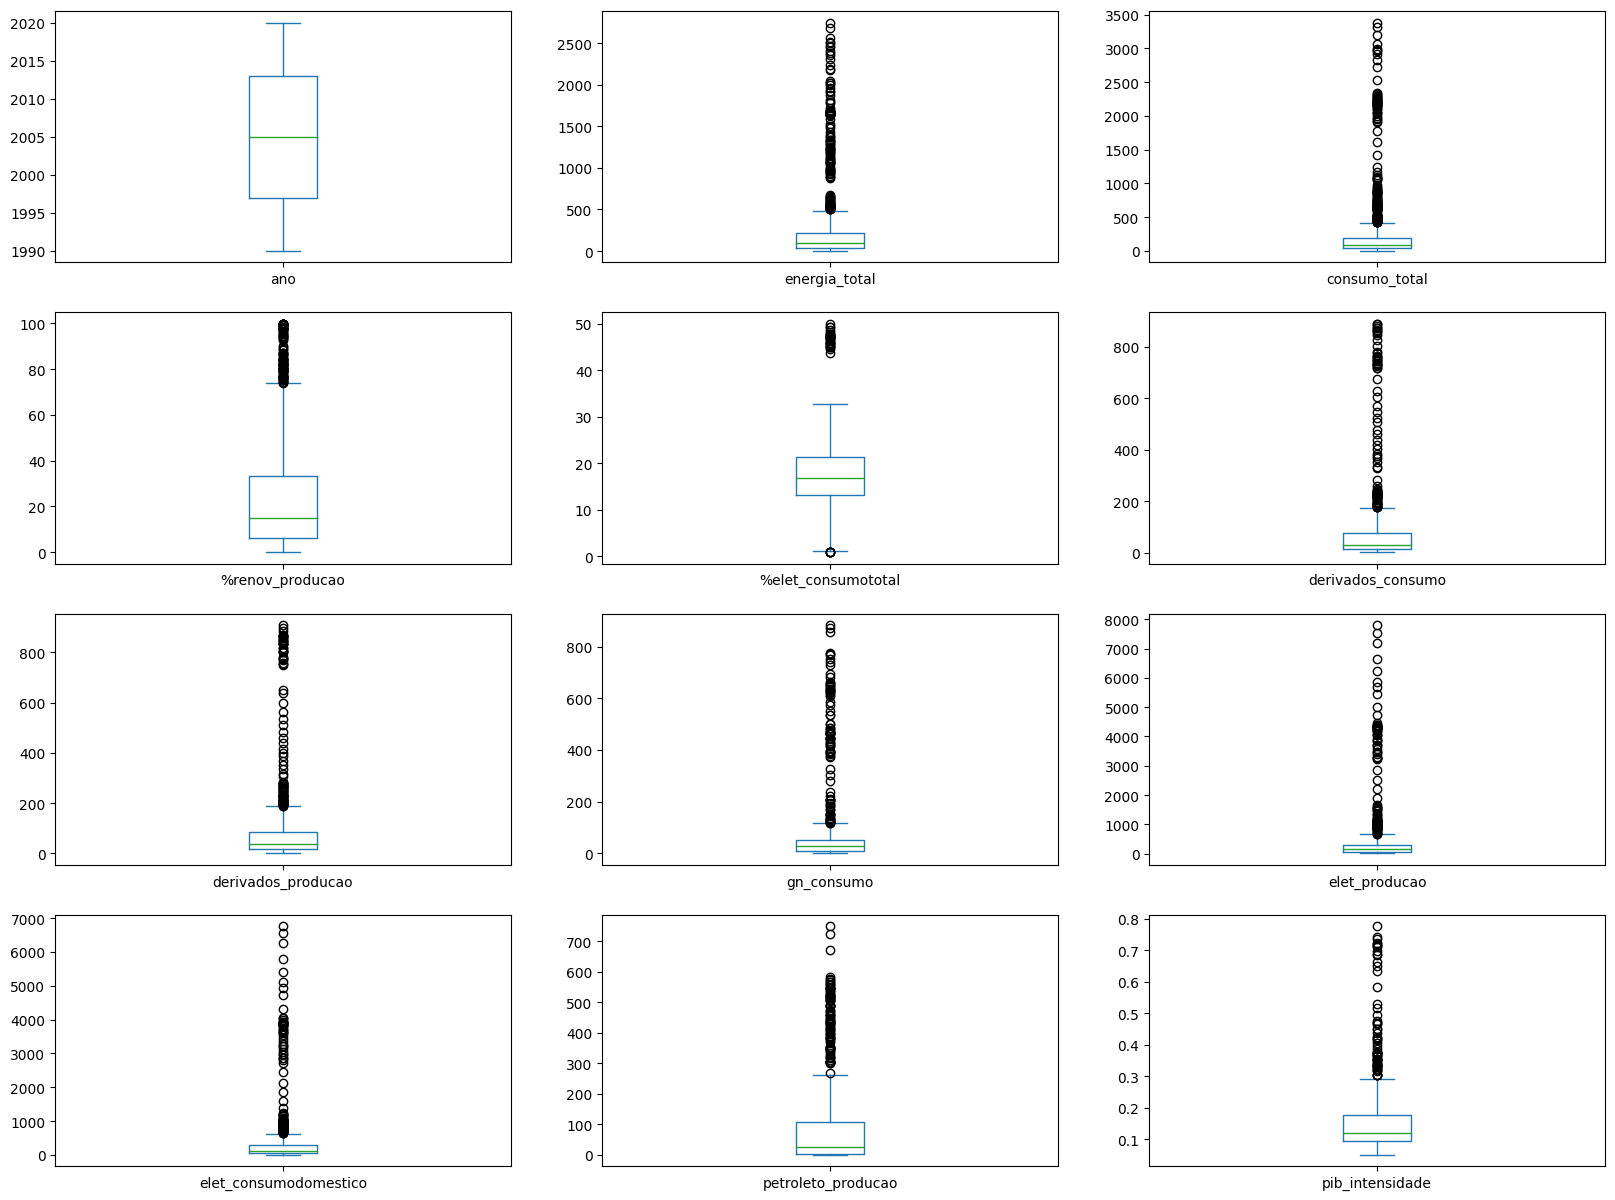

In [15]:
# Boxplot
Energy.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15))
plt.show()

Por fim, através do gráfico Box Plot é possível entender a distribuição das variáveis a partir das medianas, quartis e valores extermos/outliers.
Considerando que para interpretar esse gráfico é importante notar que:
 >Primeiro Quartil - 25% das observações encontram-se abaixo deste valor
 
 >Terceiro Quartil - 75% das observações encontram-se abaixo deste valor

Com exceção da variável ano, em todos os outros atributos do Dataframe é observada uma disperção considerável. Isso ocorre pela carcterística da Base de dados utilizada, os valores apresentam grande crescimento ao longo dos anos e a característica dos paises varia bastantes, ocasionando uma dispersão alta nos dados analisados de forma geral.

**Análise das principais variáveis**

Após a análise do Dataframe realizada anteriormente, foi possível identificar as principais características de cada variável. Nesta próxima etapa podemos avaliar características específicas de cada atributo para melhor interpretação dos dados. 

Text(0.5, 12.44444444444443, 'Ano')

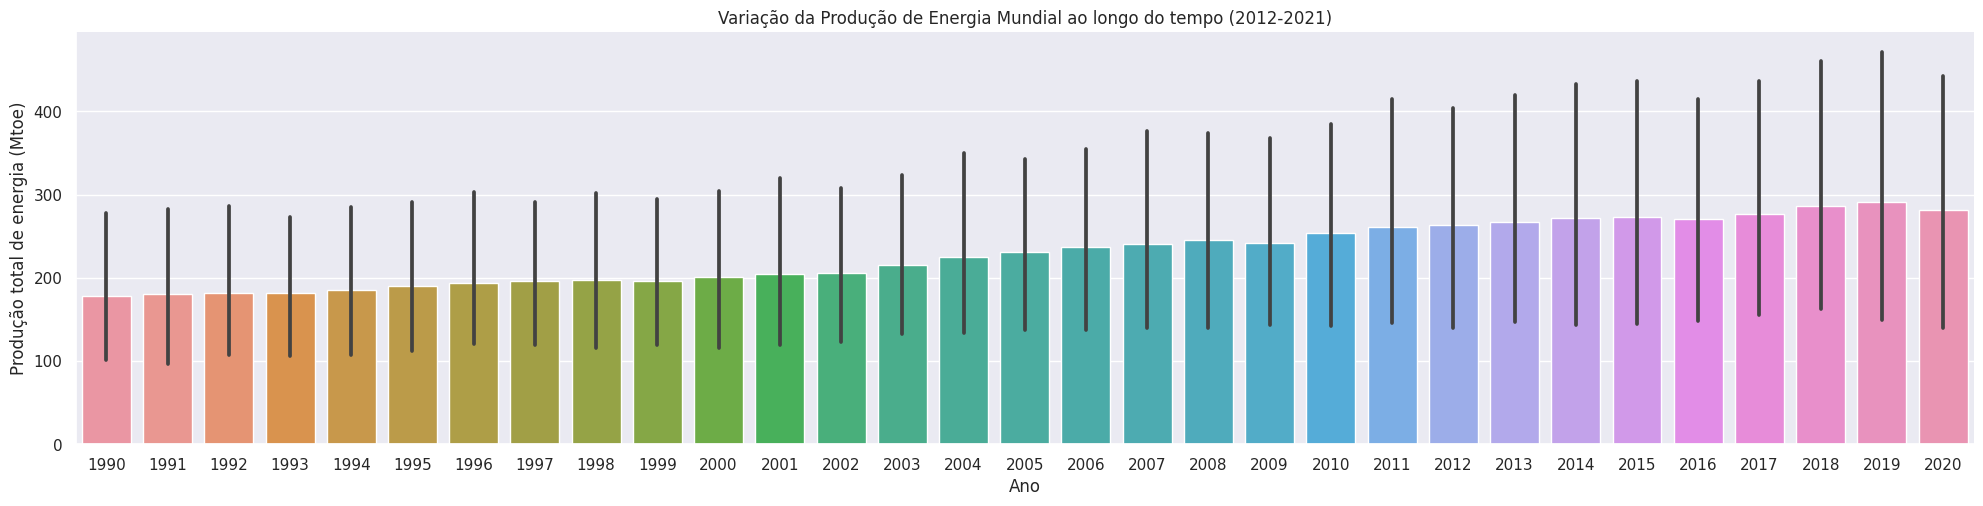

In [16]:
# Boxplot da Produção de energia por ano
sns.set_theme()
sns.catplot(y="energia_total", x="ano", kind="bar",  aspect = 4, data=Energy)
plt.title("Variação da Produção de Energia Mundial ao longo do tempo (2012-2021)")
plt.ylabel("Produção total de energia (Mtoe)")
plt.xlabel("Ano")


Text(0.5, 12.44444444444443, 'Ano')

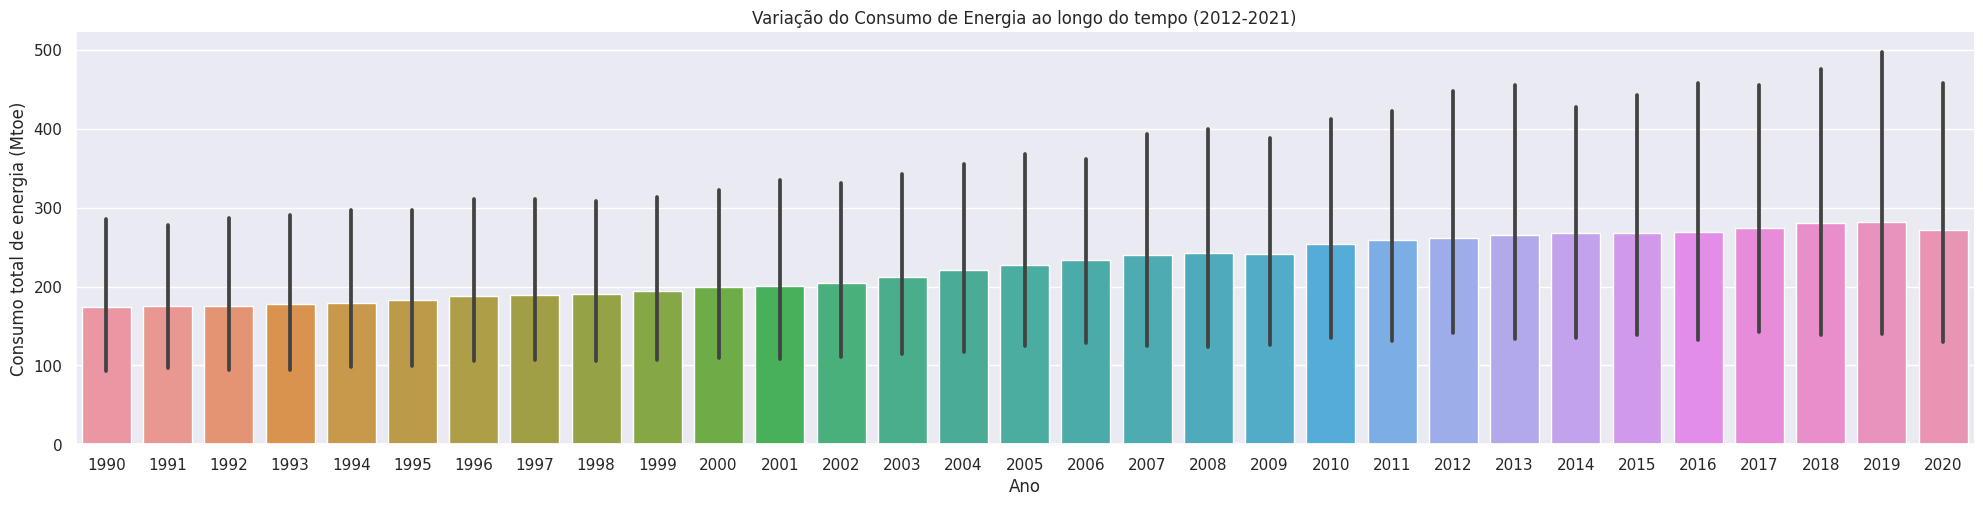

In [17]:
# Boxplot da Consumo de energia por ano
sns.set_theme()
sns.catplot(y="consumo_total", x="ano", kind="bar",  aspect = 4, data=Energy)
plt.title("Variação do Consumo de Energia ao longo do tempo (2012-2021)")
plt.ylabel("Consumo total de energia (Mtoe)")
plt.xlabel("Ano")

A partir da análise da Produção e do Consumo de energia ao longo do tempo, é possível oconcluir que as variáveis avançaram na mesma direção.
O pico de ambos os gráficos ocorreu em 2019.
> No ano de 2020, último período detalhado no Dataset, podemos observar houve um pequeno descréscimo na Produção e no Consumo de energia, ocorrido por conta da Pandemia do vírus COVID 19 que impactou a economia global.





# Visualizações Multimodais

Para possibilitar a identificação de correlação entre os atributos e influência entre variáveis do Dataset de Energia, iremos utilizar a matriz de correlação entre os atributos de produção e consumo de energia

O coeficiente de correlação varia de 1 a -1, onde quanto mais próximo de 1 representa forte correlação, próximo de -1 fraca correlação, e zero indica não haver correlação entre as variáveis.


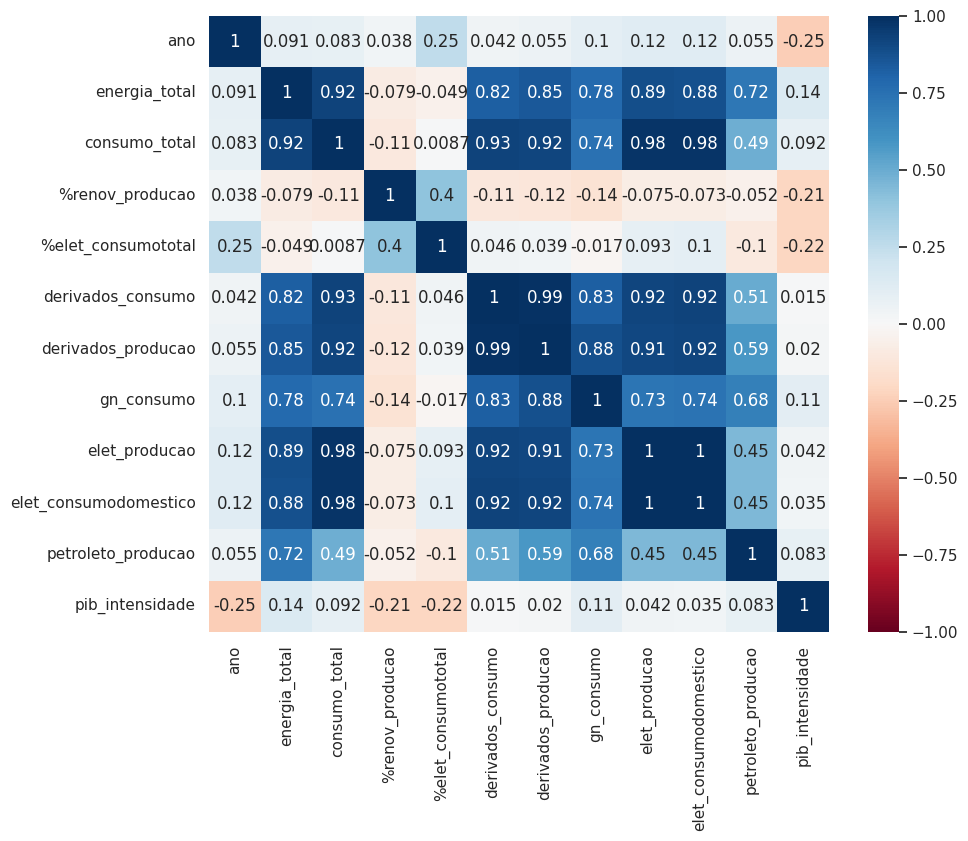

In [18]:
# Matriz de Correlação com Seaborn

plt.figure(figsize = (10,8))
sns.heatmap(Energy.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

A partir desde gráfico de correlação é possível confirmar a análise realizada anteriormente, indicando o alto índice de correlação entre a Produção e o Consumo de energia ao longo do tempo. 

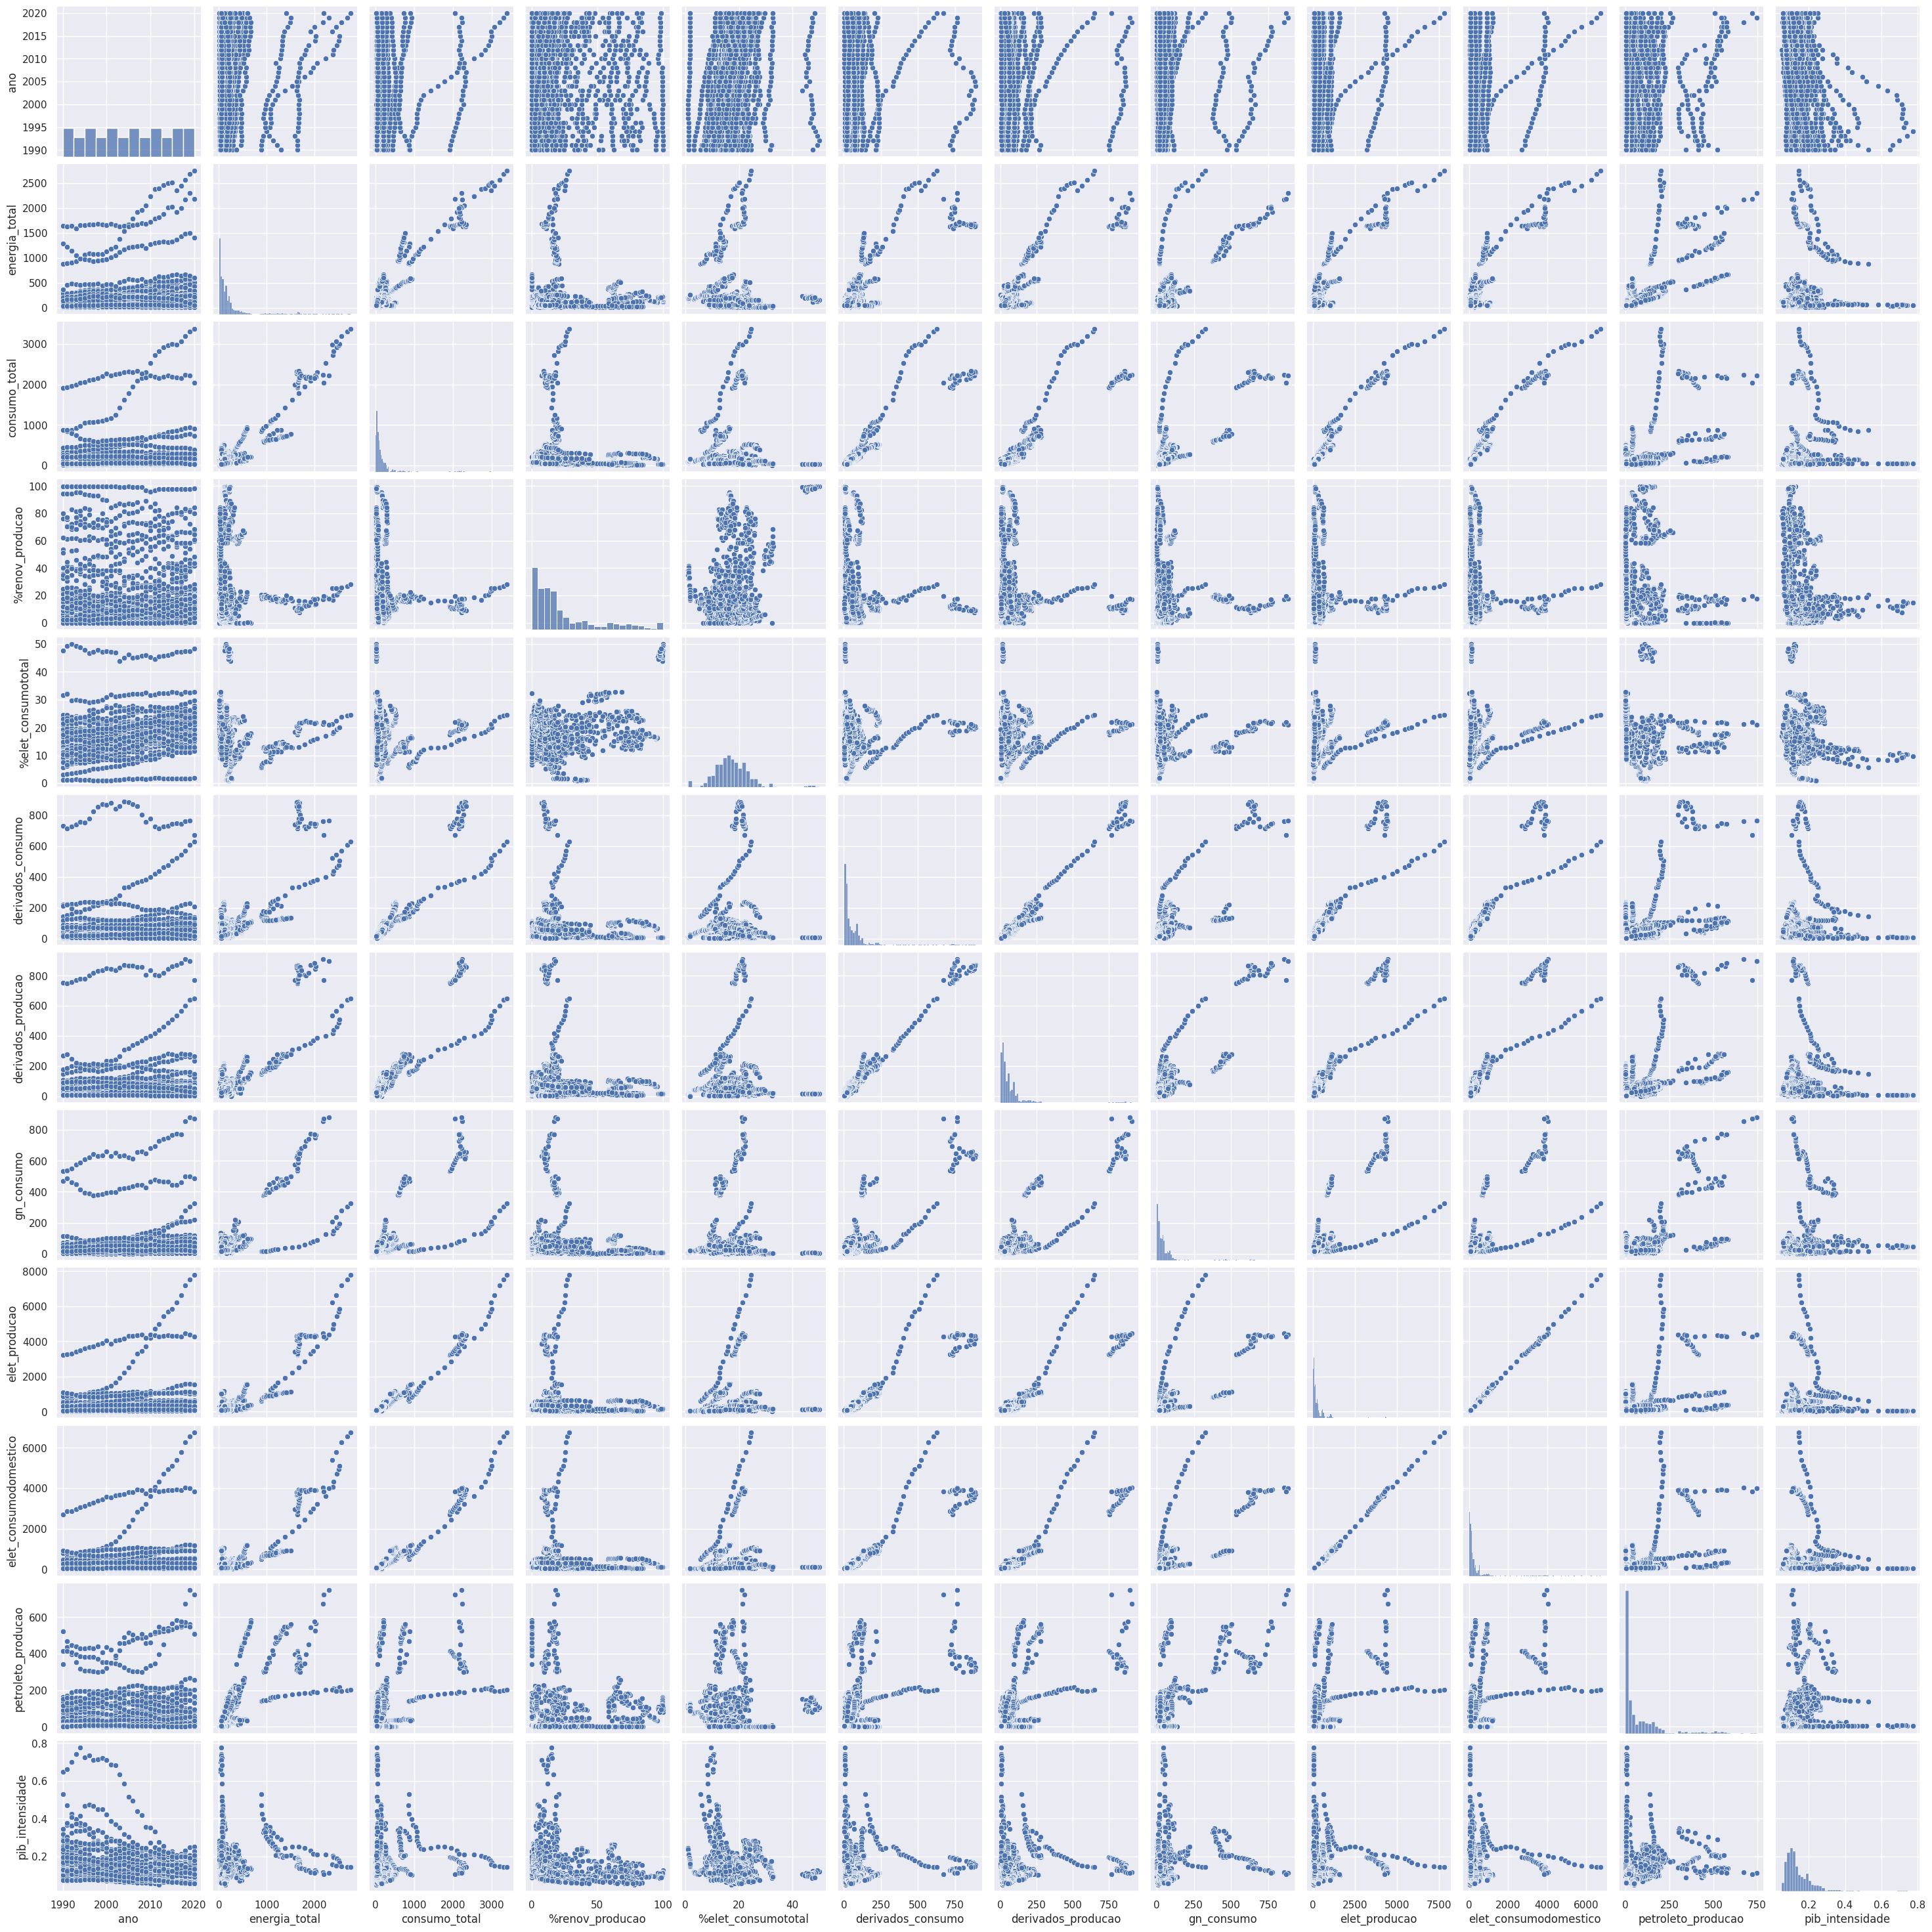

In [19]:
# Scatter Plot com Seaborn - Variação entre variáveis

sns.pairplot(Energy)

Por fim, é possível observar a correlação entre cada variável a partir do gráfico de Dispersãom onde cada par de atributos do Dataset é analisado separadamente utilizando Seaborn.

# **3 - Pré Processamento de Dados**

Nesta etapa podem ser realizadas diversas operações para o Pré-processamento de dados e a limpeza da base de dados.

# Tratamento de Missings e Limpeza

Identificação de valores faltantes ou missing.

In [20]:
# verificando nulls - valores faltantes na Base de Dados
Energy.isnull().sum()

pais                     0
ano                      0
seculo                   0
regiao                   0
energia_total            0
consumo_total            0
%renov_producao          0
%elet_consumototal       0
derivados_consumo        0
derivados_producao       0
gn_producao              0
gn_consumo               0
elet_producao            0
elet_consumodomestico    0
carvao_consumo           0
carvao_producao          0
eolica_solar             0
petroleto_producao       0
pib_intensidade          0
dtype: int64

<Axes: >

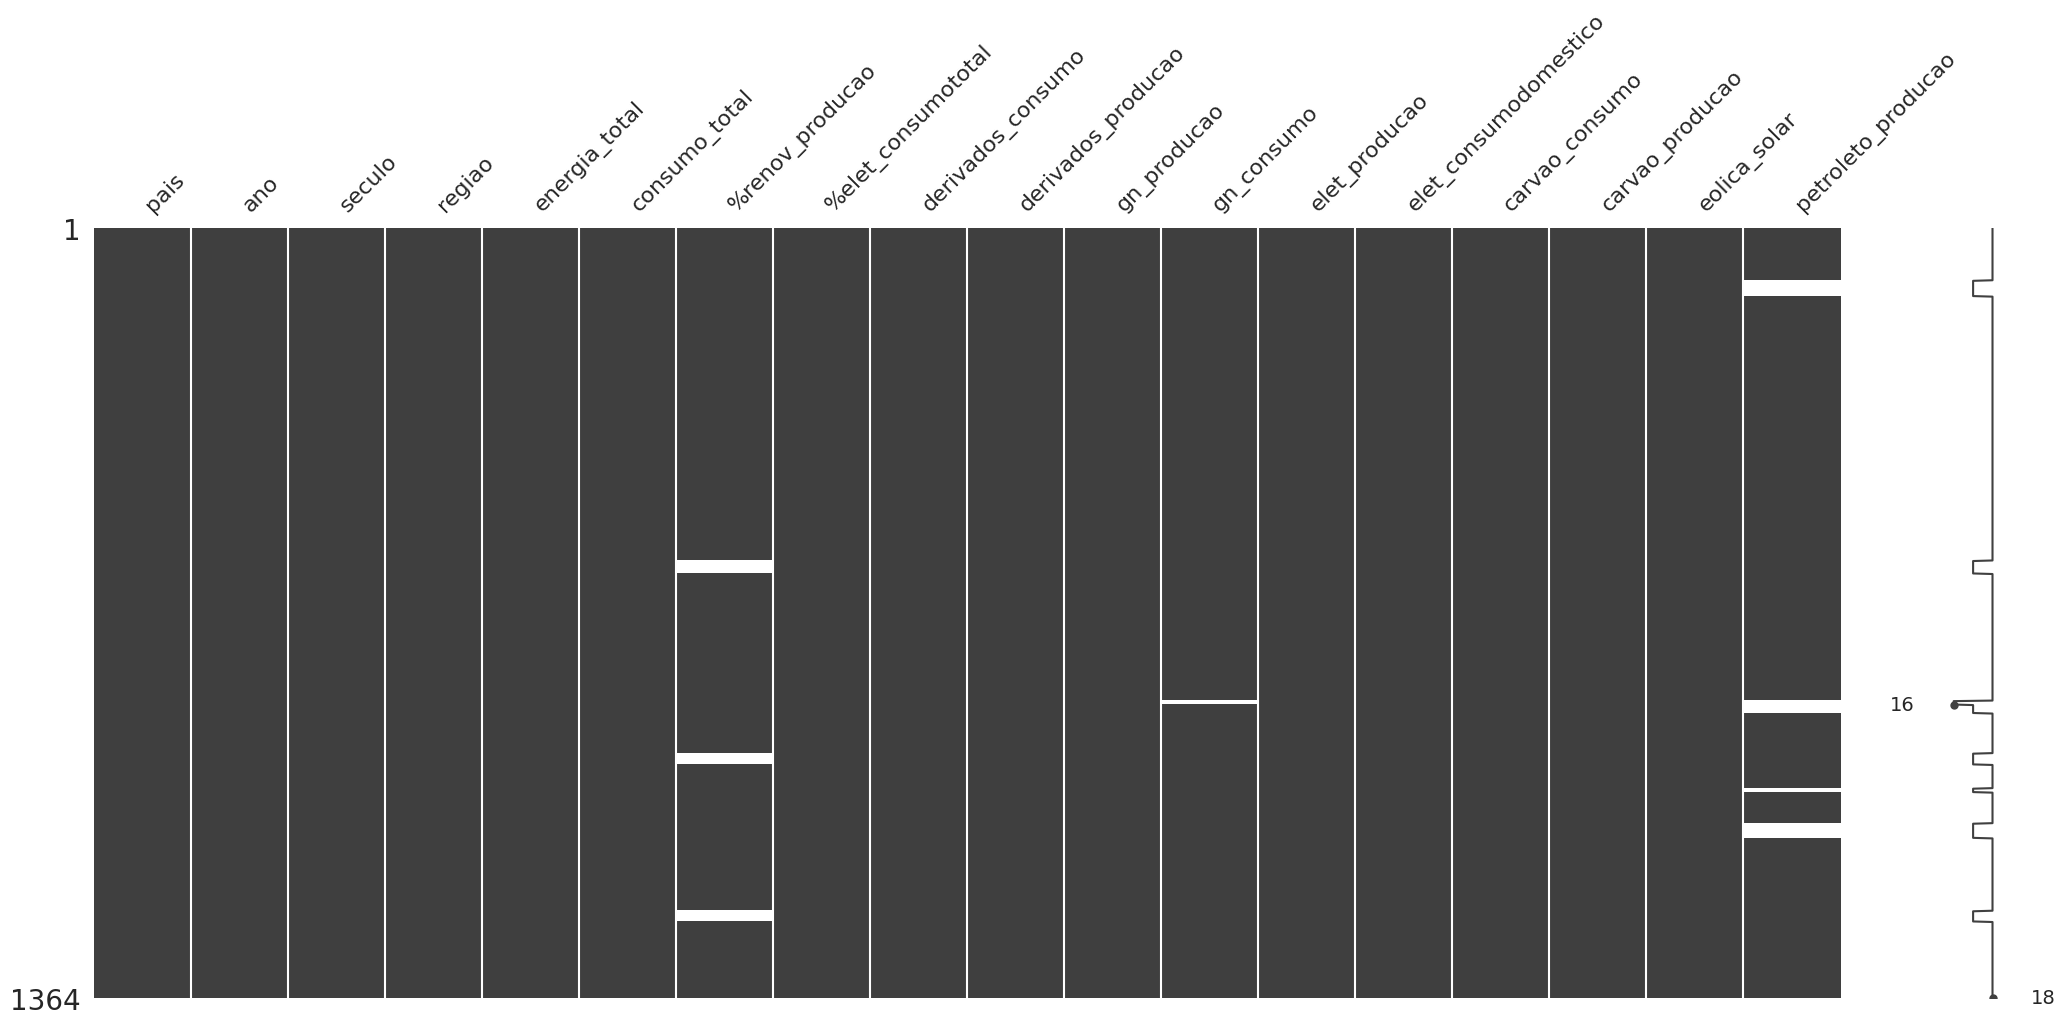

In [21]:
# Importante Salvar um Novo dataset para realizar a limpaza dos dados. 
# Neste caso a Base de dados não possui nenhum valor Missing, mas abaixo está a tratativa caso fosse necessário.

# recuperando os nomes das colunas
col = list(Energy.columns)

# o novo dataset irá conter todas as colunas com exceção da última
atributos = Energy[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Após identificação dos valores faltantes, selecionamentos apenas as colunas que ainda são necessárias de manter no Dataset.

<Axes: >

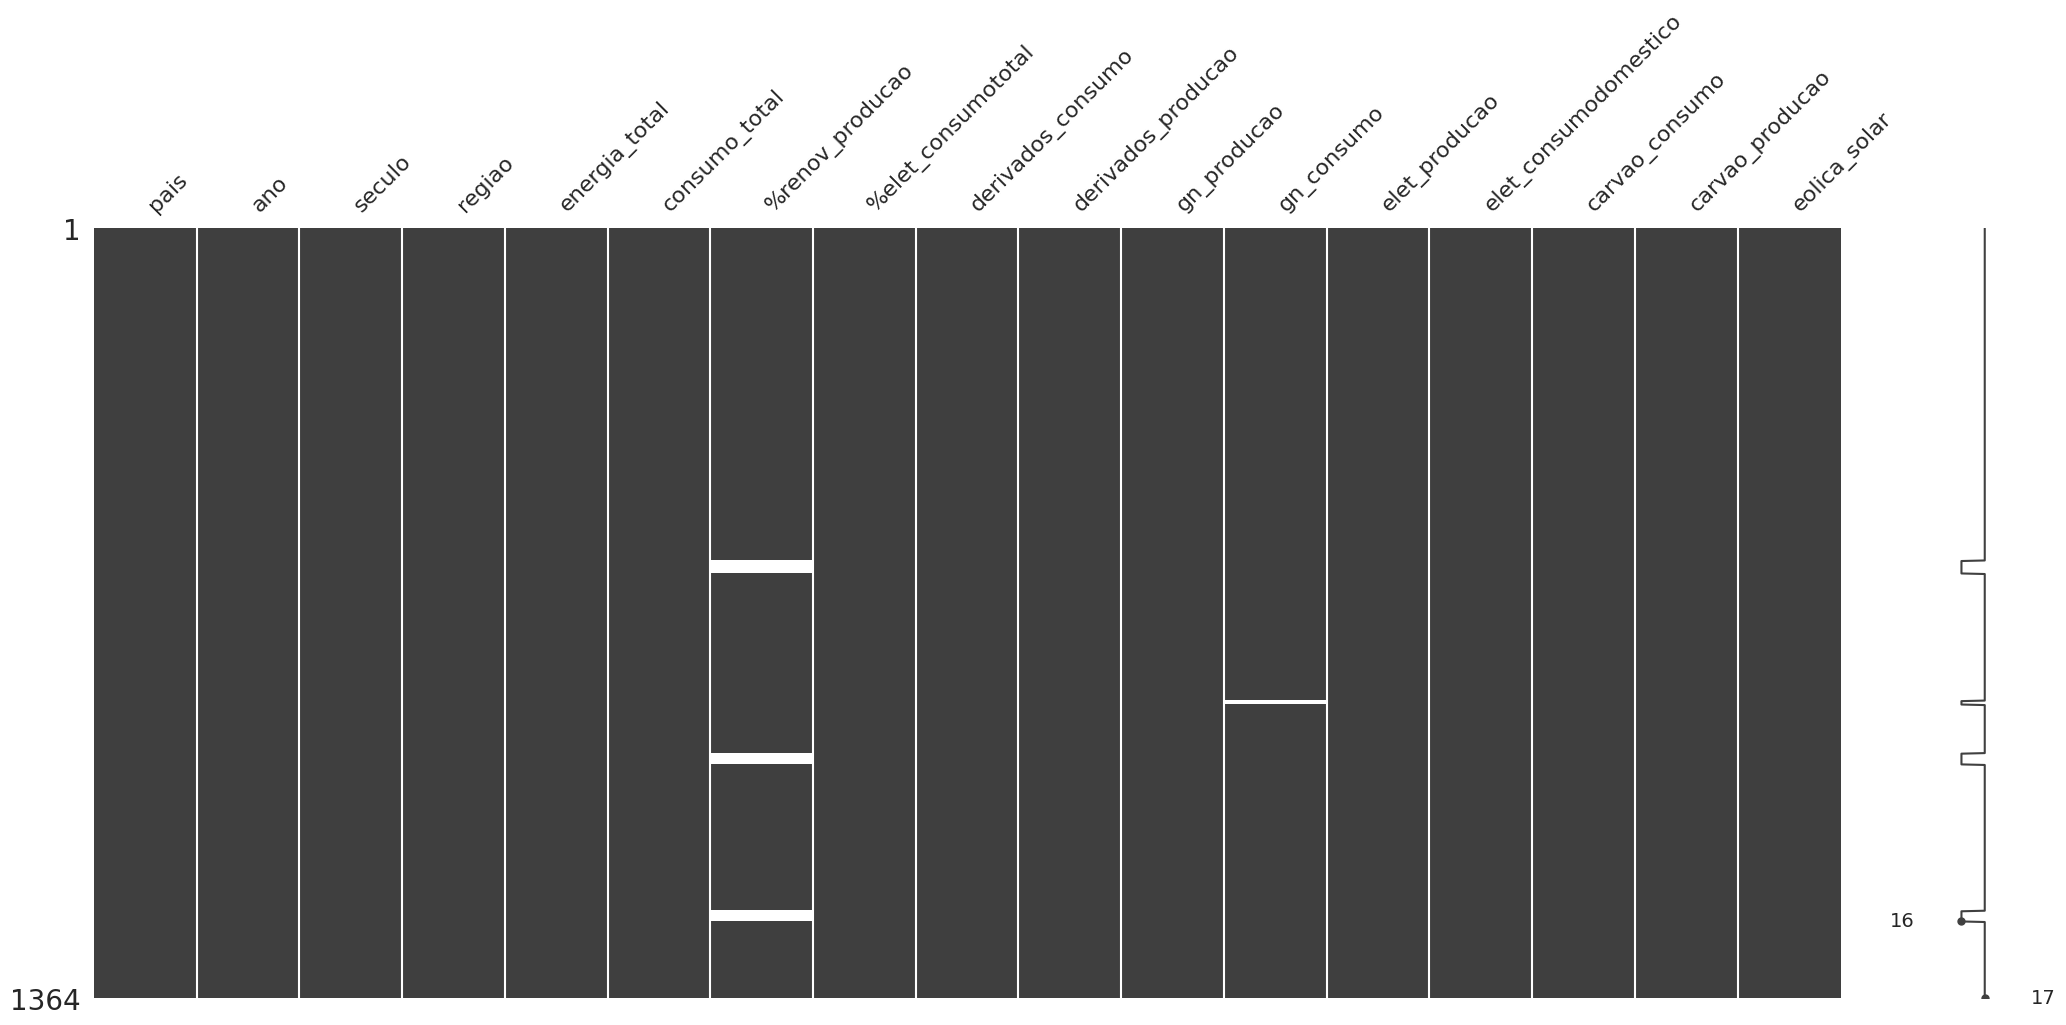

In [24]:
# removendo as coluna 'petroleto_producao '
atributos.drop([ 'petroleto_producao'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)
     

In [54]:
atributos.shape

(1364, 17)

# Separação em conjunto de treino e conjunto de teste

Para coninuação da análise vamos aplicar a técinca de Separação em Conjunto de treinamento e teste.

In [56]:
test_size = 0.20
seed = 7

array = Energy.values

X_sm = array[ : , 0:16 ]
y_sm = array[: , 16 ]

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm)



ValueError: ignored